# Project Part 1

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/sgeinitz/CS39AA-project/blob/main/project_part1.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sgeinitz/CS39AA-project/blob/main/project_part1.ipynb)

This notebook is intended to serve as a template to complete Part 1 of the projects. Feel free to modify this notebook as needed, but be sure to have the two main parts, a) a introductory proposal section describing what it is your doing to do and where the dataset originates, and b) an exploratory analysis section that has the histograms, charts, tables, etc. that are the output from your exploratory analysis. 

__Note you will want to remove the text above, and in the markdown cells below, and replace it with your own text describing the dataset, task, exploratory steps, etc.__

## 1. Introduction/Background

<font size ="3">For my 39AA Project, I plan to use a dataset related to sports analytics to gain hands-on experience working with data in the world of sports. With the guidance of Professor Geinitz, we successfully located a Kaggle competition called NFL Big Data Bowl 2024, which is hosted by The National Football League. This competition offers multiple CSV files that contain a wide range of data from the 2022 NFL season. One of these datasets specifically focuses on NFL players who participated in the 2022 season, providing information such as their NFL ID, height, weight, birthdate, college, and position.</font>

<font size ="3">Using this NFL Players dataset, my objective is to predict a player's position based on their height, weight, and college. This task falls under the domain of Natural Language Processing (NLP) and specifically involves text classification. Text classification in NLP refers to the process of assigning predefined categories or labels to textual information based on its content. In this case, the textual information consists of the player's height, weight, and college, and the goal is to classify this information into specific positions such as quarterback, running back, corner back, defensive tackle, and so on.</font>


## 2. Exploratory Data Analysis

_You will now load the dataset and carry out some exploratory data analysis steps to better understand what text data looks like. See the examples from class on 10/. The following links provide some good resources of exploratory analyses of text data with Python._


* https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
* https://regenerativetoday.com/exploratory-data-analysis-of-text-data-including-visualization-and-sentiment-analysis/
* https://medium.com/swlh/text-summarization-guide-exploratory-data-analysis-on-text-data-4e22ce2dd6ad  
* https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html  


Now that the data

In [1]:
# import all of the python modules/packages you'll need here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from wordcloud import WordCloud
stopwords = ["dType", "Name", "Length", "collegeName", "object"]
# ...

In [2]:
playersDataUrl = "https://raw.githubusercontent.com/glaframb71/CS39AA-Project/main/data/players.csv"
players = pd.read_csv(playersDataUrl)

players.head(10)

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan
5,33099,6-6,245,1985-01-16,Delaware,QB,Joe Flacco
6,33107,6-4,315,1985-08-30,Virginia Tech,T,Duane Brown
7,33130,5-10,175,1986-12-01,California,WR,DeSean Jackson
8,33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell
9,33138,6-3,222,1985-07-02,Michigan,QB,Chad Henne


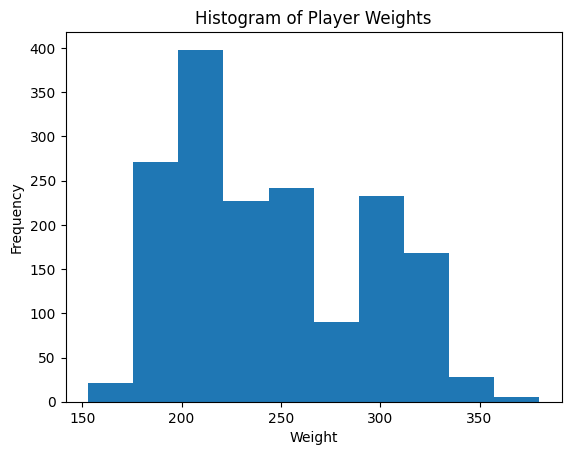

In [3]:
weights = players['weight'].tolist()

plt.hist(weights, bins=10)  # Adjust the number of bins as needed
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Histogram of Player Weights")

plt.show()


<Axes: >

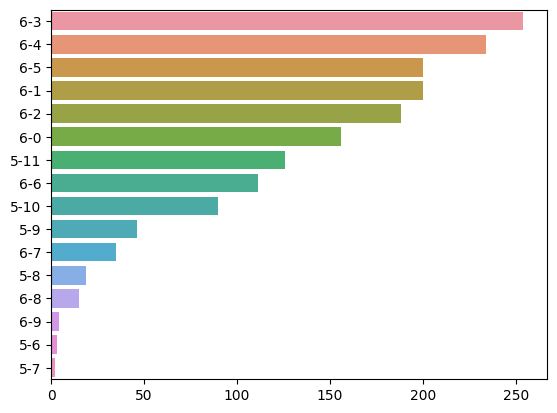

In [4]:
heights = players['height'].str.split()
heights = heights.tolist()
heightsGathered=[word for i in heights for word in i]

from collections import Counter
heightCounter=Counter(heightsGathered)
heightMost=heightCounter.most_common()

x, y = [], []
for word, count in heightMost:
    if (word not in stopwords):
        x.append(word)
        y.append(count)

sns.barplot(x=y, y=x)

<Axes: >

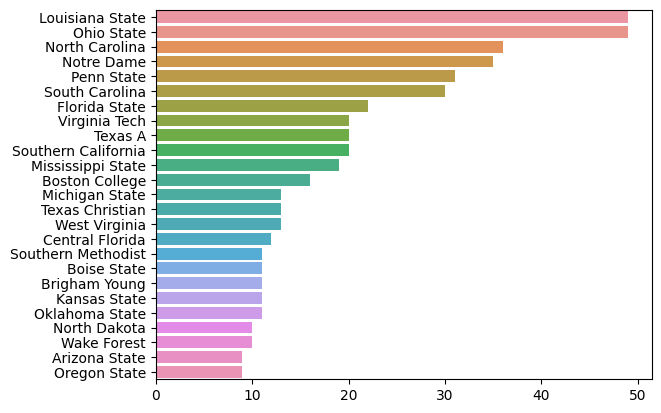

In [5]:
colleges = players['collegeName'].str.findall(r'\b\w+\s\w+\b')
colleges = colleges.tolist()
collegesGathered=[word for i in colleges for word in i]

collegeCounter=Counter(collegesGathered)
collegeMost=collegeCounter.most_common()

x, y = [], []
for word, count in collegeMost[:25]:
    if (word not in stopwords):
        x.append(word)
        y.append(count)

sns.barplot(x=y, y=x)

<Axes: >

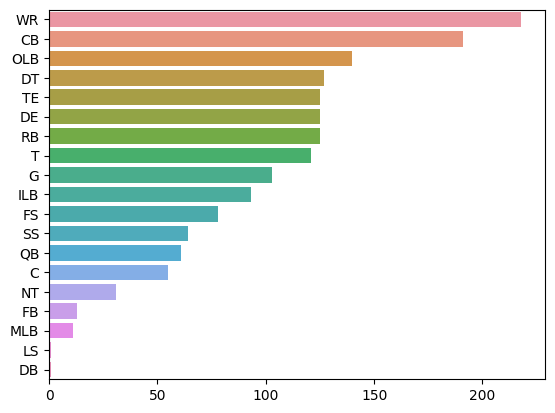

In [6]:
positions = players['position'].str.split()
positions = positions.tolist()
positionsGathered=[word for i in positions for word in i]

positionCounter=Counter(positionsGathered)
positionMost=positionCounter.most_common()

x, y = [], []
for word, count in positionMost:
    if (word not in stopwords):
        x.append(word)
        y.append(count)

sns.barplot(x=y, y=x)